# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=2d7c4971378f2de42b24f534e20ab568&units=metric&q=


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create series for data capture
citynames = []
cloudiness = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speed = []
country = []

# set count of cities in series
city_number = 0

# Loop through the list of cities and perform api request, parse response and store in series
for city in cities:
    try:
        print(f"Processing Record {city_number} | {city}")
        response = requests.get(query_url + city).json()
        citynames.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_number += 1
    except Exception:
        print("City not found. Skipping...")
        
print("------Data Retrieval Complete------")


Processing Record 0 | port hardy
Processing Record 1 | iqaluit
Processing Record 2 | ushuaia
Processing Record 3 | jamestown
Processing Record 4 | puerto ayora
Processing Record 5 | kumluca
Processing Record 6 | sitka
Processing Record 7 | port lincoln
Processing Record 8 | arinos
Processing Record 9 | kapaa
Processing Record 10 | rikitea
Processing Record 11 | bluff
Processing Record 12 | te anau
Processing Record 13 | blackwater
Processing Record 14 | tocopilla
Processing Record 15 | norman wells
Processing Record 16 | new norfolk
Processing Record 17 | roald
Processing Record 18 | east london
Processing Record 19 | bakchar
Processing Record 20 | tuktoyaktuk
Processing Record 21 | castro
Processing Record 22 | albany
Processing Record 23 | cape town
Processing Record 24 | bredasdorp
Processing Record 25 | punta arenas
Processing Record 26 | busselton
Processing Record 27 | kronach
Processing Record 28 | avarua
Processing Record 29 | hobart
Processing Record 30 | bengkulu
Processing R

City not found. Skipping...
Processing Record 212 | marsh harbour
Processing Record 213 | rundu
Processing Record 214 | jefferson city
Processing Record 215 | thompson
Processing Record 216 | gao
Processing Record 217 | pakwach
City not found. Skipping...
Processing Record 217 | beloha
Processing Record 218 | velsk
Processing Record 219 | srednekolymsk
Processing Record 220 | vao
Processing Record 221 | auki
Processing Record 222 | taoudenni
Processing Record 223 | lichinga
Processing Record 224 | khatanga
Processing Record 225 | hamilton
Processing Record 226 | sakaiminato
Processing Record 227 | tiznit
Processing Record 228 | kalmunai
Processing Record 229 | high level
Processing Record 230 | anadyr
Processing Record 231 | vaitape
Processing Record 232 | coaraci
Processing Record 233 | saint anthony
Processing Record 234 | lata
Processing Record 235 | isangel
Processing Record 236 | bandarbeyla
Processing Record 237 | bilibino
Processing Record 238 | bloomingdale
Processing Record 23

Processing Record 424 | cukai
Processing Record 425 | santarem
Processing Record 426 | novooleksiyivka
Processing Record 427 | tapaua
City not found. Skipping...
Processing Record 427 | maragogi
Processing Record 428 | macon
Processing Record 429 | bac lieu
Processing Record 430 | el real de santa maria
Processing Record 431 | solnechnyy
Processing Record 432 | evanston
Processing Record 433 | gilleleje
Processing Record 434 | wulanhaote
City not found. Skipping...
Processing Record 434 | asau
Processing Record 435 | luba
Processing Record 436 | trairi
Processing Record 437 | montepuez
Processing Record 438 | warrington
Processing Record 439 | sibu
Processing Record 440 | talnakh
Processing Record 441 | atar
Processing Record 442 | batticaloa
Processing Record 443 | yunjinghong
City not found. Skipping...
Processing Record 443 | lashma
Processing Record 444 | chapais
Processing Record 445 | maceio
Processing Record 446 | la ronge
Processing Record 447 | ambilobe
Processing Record 448 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert to DataFrame
weather = {
    "citynames":citynames,
    "cloudiness":cloudiness,
    "humidity":humidity,
    "latitude":lats,
    "longitude": lngs,
    "max_temps":max_temps,
    "wind_speeds":wind_speed,
    "country":country
}

weather_df = pd.DataFrame(weather)
weather_df.head()

,citynames,cloudiness,humidity,latitude,longitude,max_temps,wind_speeds,country
0,Port Hardy,75,63,50.70,-127.42,-3.00,4.6,CA
1,Iqaluit,75,64,63.75,-68.51,-18.89,5.1,CA
2,Ushuaia,90,87,-54.80,-68.30,12.00,5.7,AR
3,Jamestown,90,84,42.10,-79.24,5.56,4.6,US
4,Puerto Ayora,90,66,-0.74,-90.35,29.00,4.1,EC


In [7]:
#Export to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

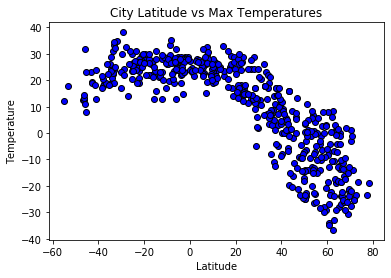

In [8]:
plt.scatter(weather_df['latitude'], weather_df['max_temps'], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Max Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#Save scatterplot
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

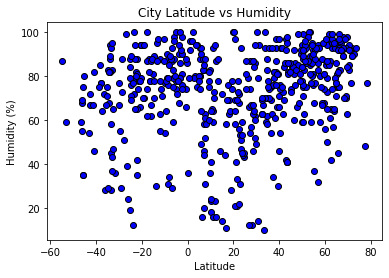

In [10]:
plt.scatter(weather_df['latitude'], weather_df['humidity'], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save scatterplot
plt.savefig("../Images/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

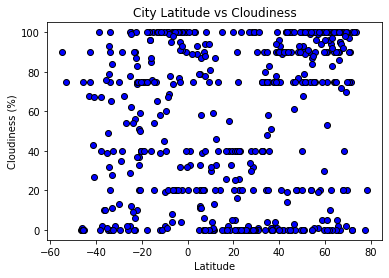

In [11]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save scatterplot
plt.savefig("../Images/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

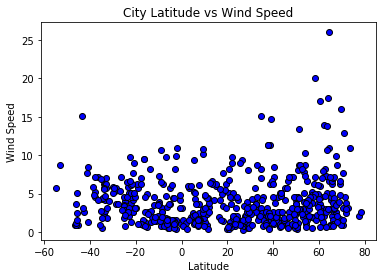

In [12]:
plt.scatter(weather_df['latitude'], weather_df['wind_speeds'], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save scatterplot
plt.savefig("../Images/lat_vs_windspeed.png")
plt.show()